In [1]:
from datasets import load_dataset
from transformers import ViTForImageClassification
from transformers import AutoImageProcessor
from torch.utils.data import DataLoader
import torch
from Utils import plot_pca, t_sne, extract_latent_features

In [2]:
check_main= '/Users/julio/Documents/PMM/Codigos/Test1/Classification-ViT/SavedModels/ViT-base-patch16-224_F/checkpoint-4512'


check_masas = '/Users/julio/Documentos-Local/checkpoint-7279'

check_calc = '/Users/julio/Documents/PMM/Codigos/Test1/Classification-ViT/SavedModels/Cal_ViT-large-patch16-224_A.ipynb/checkpoint-3780'

_checkpoint = check_calc
# Crear pipeline de extracción de features usando el modelo ViT

_dataset = '/Users/julio/Documentos-Local/data/VinDr-Mammo/subsets/calcifications_3Categories'

dataset = load_dataset(_dataset)

class_names = dataset['train'].features['label'].names

processor = AutoImageProcessor.from_pretrained(_checkpoint, use_fast=True)
def transforms(batch):
    batch['image'] = [x.convert('RGB') for x in batch['image']]
    inputs = processor(batch['image'],return_tensors='pt')
    inputs['labels'] = batch['label']  # Las clases ya están en formato numérico
    return inputs
processed_dataset = dataset.with_transform(transforms)

# Cargar el modelo preentrenado
model = ViTForImageClassification.from_pretrained(_checkpoint)

# Eliminar la capa de clasificación para obtener solo las representaciones latentes
vit_without_classifier = torch.nn.Sequential(*list(model.children())[:-1])

device = torch.device("mps")
vit_without_classifier = vit_without_classifier.to(device)


Resolving data files:   0%|          | 0/2502 [00:00<?, ?it/s]

In [3]:
# Crear DataLoader a partir del dataset procesado
dataloader = DataLoader(processed_dataset['train'], batch_size=8)  # Ajusta el batch_size según tu memoria

# Ejecutar la extracción de características
latent_features, labels = extract_latent_features(dataloader, vit_without_classifier, device)

Extrayendo representaciones latentes: 100%|██████████| 313/313 [01:53<00:00,  2.77it/s]


Varianza explicada por las primeras 10 componentes:
[0.20222668 0.09762833 0.06267377 0.03419379 0.0299339  0.02656181
 0.01968668 0.01875655 0.01736498 0.01412025]


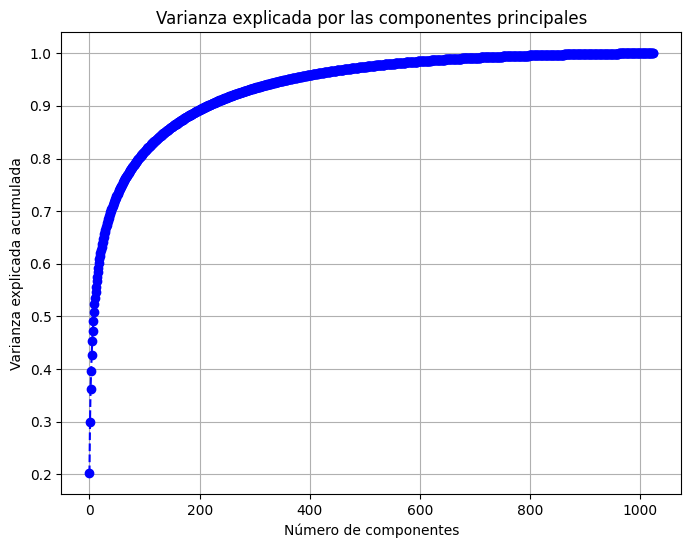

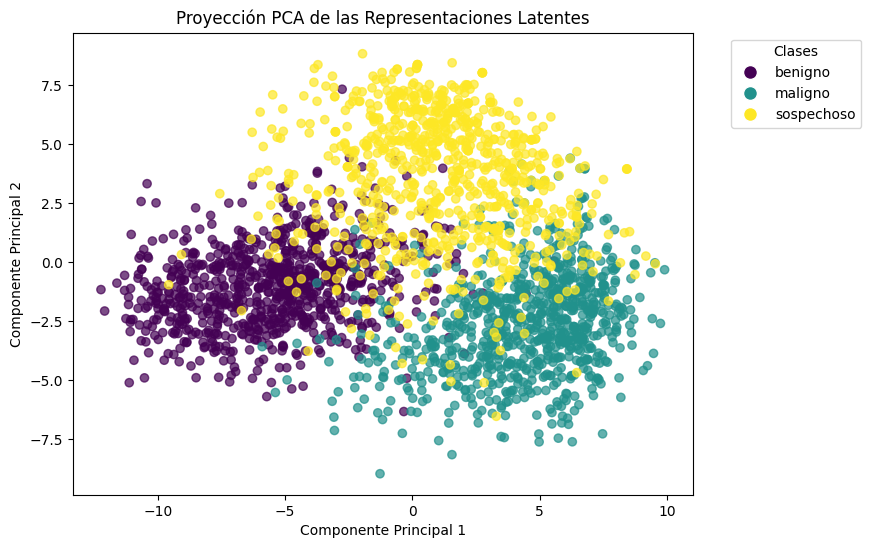

In [4]:
# Visualizar las proyecciones PCA
plot_pca(labels, latent_features, class_names)

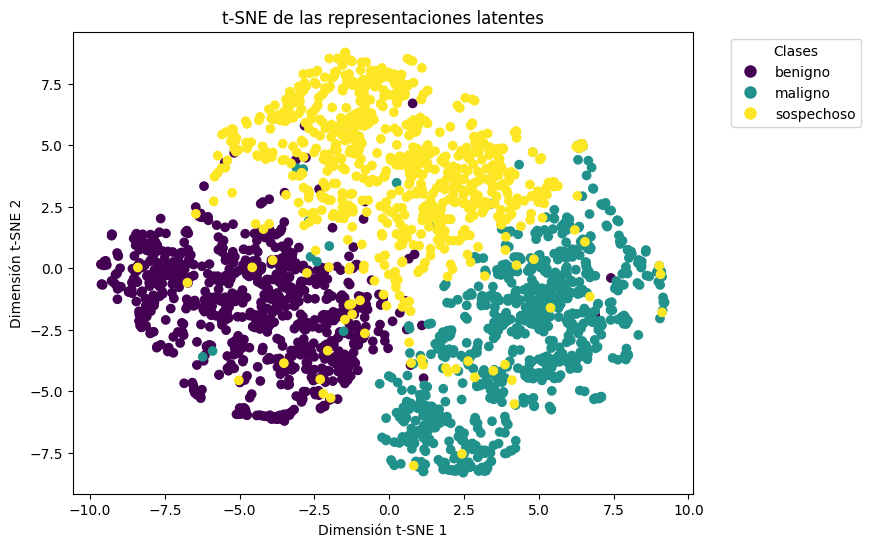

In [5]:
t_sne(labels, latent_features, class_names)